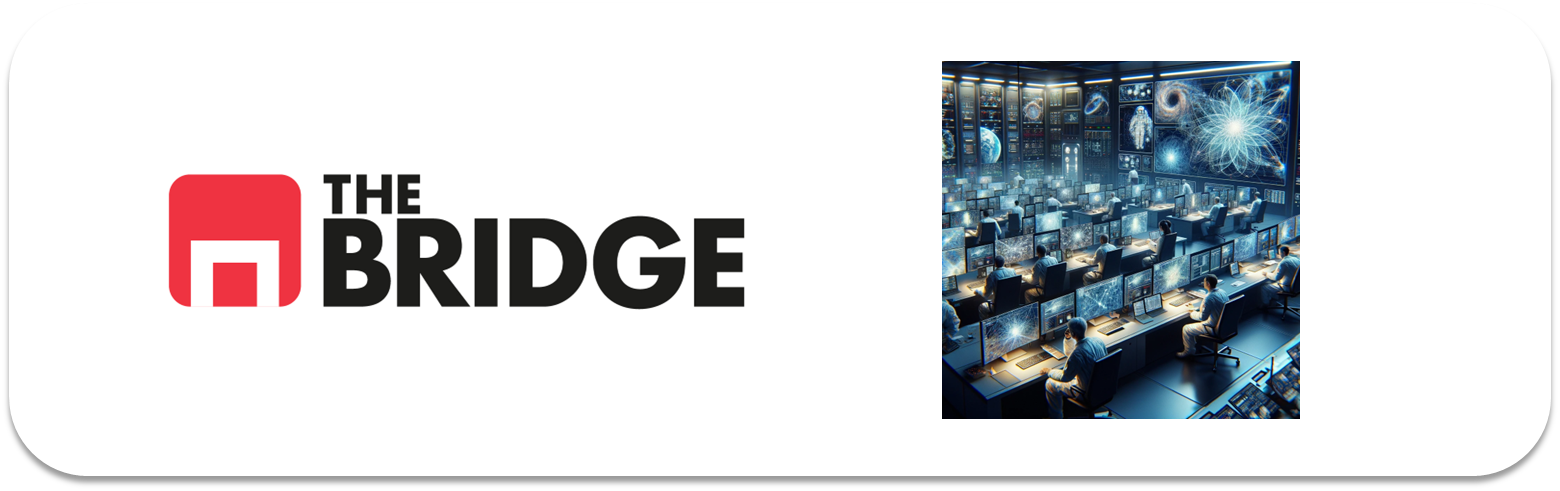

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import os
from PIL import Image
from keras.callbacks import EarlyStopping

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [4]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.resize((32, 32))
            images.append(np.array(img))
            label = 1 if 'dog' in filename else 0
            labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:
# Cargar datos de entrenamiento
train_folders = ['data/github_train_0', 'data/github_train_1', 'data/github_train_2', 'data/github_train_3']
X_train, y_train = [], []
for folder in train_folders:
    images, labels = load_images_from_folder(folder)
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Cargar datos de prueba
X_test, y_test = load_images_from_folder('data/github_test')

print(f'Dimensión de los datos de entrenamiento: {X_train.shape}, Dimensión de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Dimensión de los datos de prueba: {X_test.shape}, Dimensión de las etiquetas de prueba: {y_test.shape}')

Dimensión de los datos de entrenamiento: (4000, 32, 32, 3), Dimensión de las etiquetas de entrenamiento: (4000,)
Dimensión de los datos de prueba: (1000, 32, 32, 3), Dimensión de las etiquetas de prueba: (1000,)


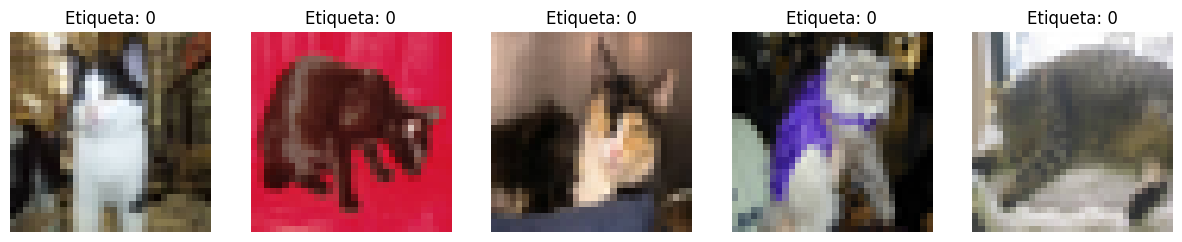

Número de muestras de entrenamiento: 4000
Número de muestras de prueba: 1000
Tamaño de las imágenes: (32, 32, 3)


In [6]:
# Visualizar el conjunto de datos
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.set_title(f'Etiqueta: {y_train[i]}')
    ax.axis('off')
plt.show()

# Mini EDA
print(f'Número de muestras de entrenamiento: {X_train.shape[0]}')
print(f'Número de muestras de prueba: {X_test.shape[0]}')
print(f'Tamaño de las imágenes: {X_train.shape[1:]}')


In [7]:
# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Construir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,561 (1.20 MB)

 Trainable params: 314,561 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6160 - loss: 0.6714 - val_accuracy: 0.0000e+00 - val_loss: 1.0670
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6186 - loss: 0.6460 - val_accuracy: 0.1200 - val_loss: 1.0240
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6631 - loss: 0.6124 - val_accuracy: 0.3425 - val_loss: 0.9553
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6798 - loss: 0.5878 - val_accuracy: 0.2338 - val_loss: 1.0425
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7254 - loss: 0.5434 - val_accuracy: 0.5838 - val_loss: 0.7347
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7488 - loss: 0.5122 - val_accuracy: 0.7350 - val_loss: 0.5539
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7554 - loss: 0.4867 - val_accuracy: 0.4800 - val_loss: 0.8821
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7897 - loss: 0.4478 - val_accuracy

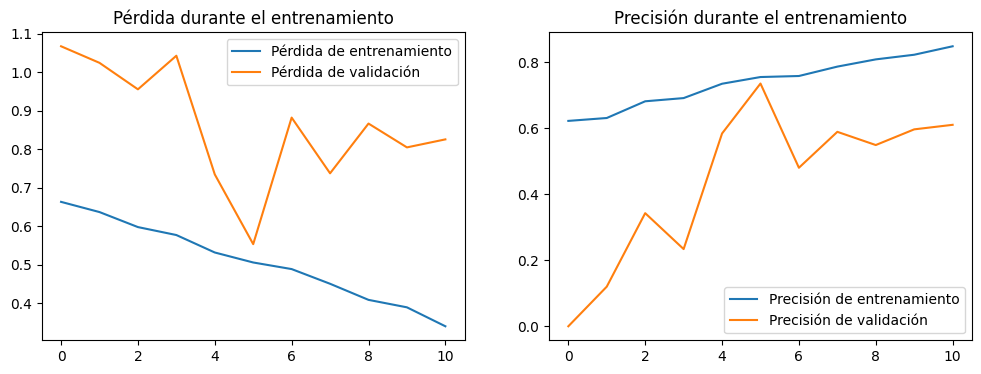

In [9]:
# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Mostrar el historial de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.title('Precisión durante el entrenamiento')

plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

        Gato       0.75      0.72      0.73       500
       Perro       0.73      0.76      0.74       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



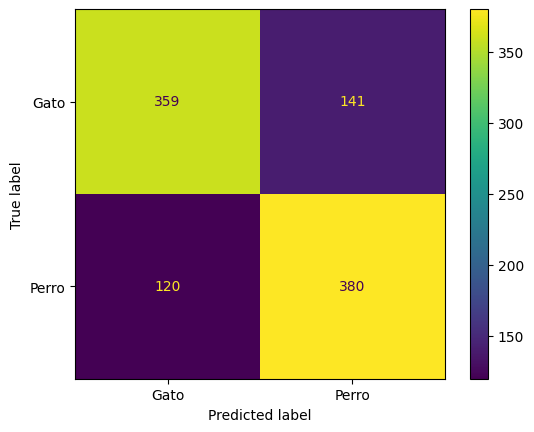

In [10]:
# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['Gato', 'Perro']))

# Mostrar la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Gato', 'Perro'])
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


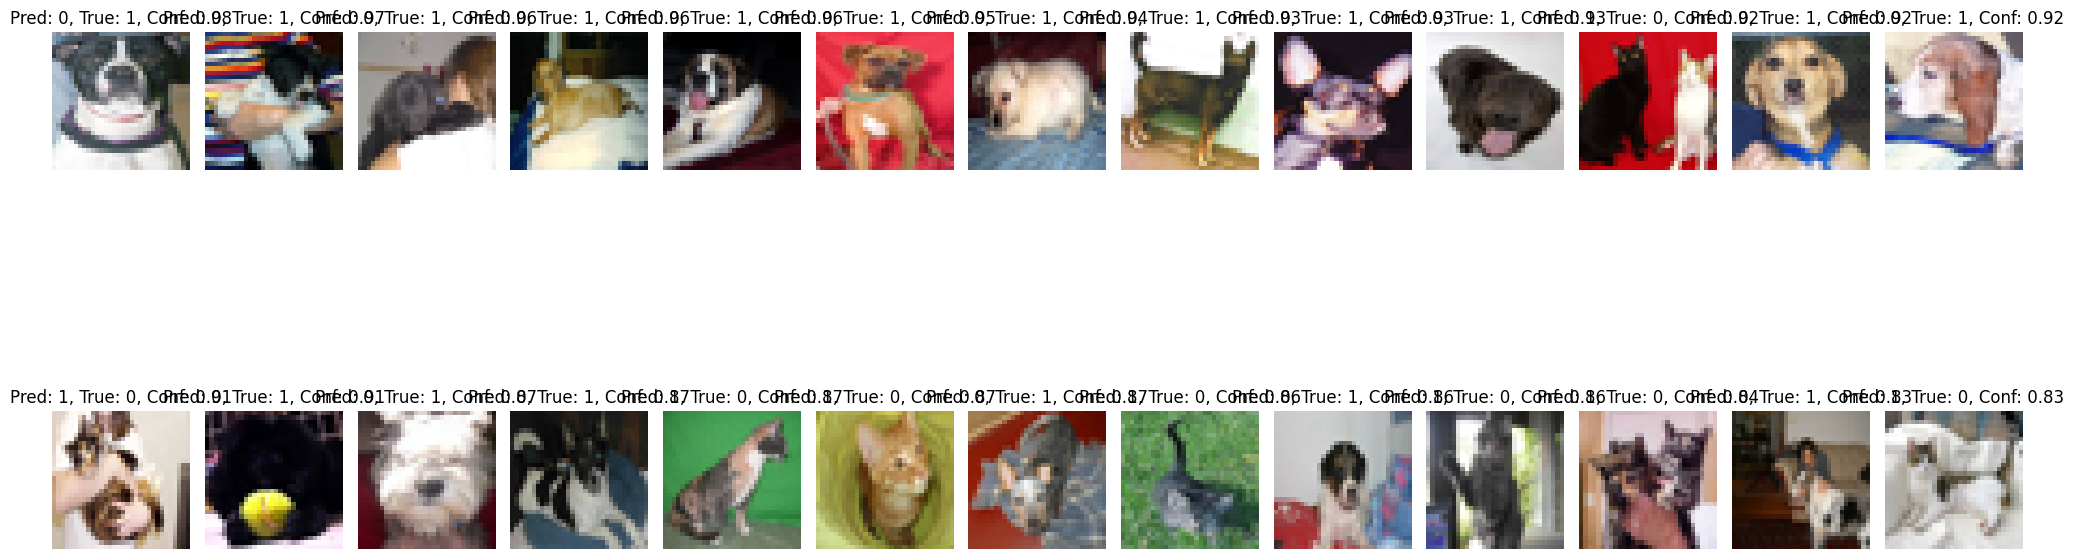

In [13]:
# Obtener las probabilidades de las predicciones
y_prob = model.predict(X_test)

# Identificar las imágenes mal clasificadas
misclassified_indices = np.where(y_pred.flatten() != y_test)[0]

# Obtener las probabilidades de las imágenes mal clasificadas
misclassified_probs = y_prob[misclassified_indices]

# Obtener las etiquetas verdaderas de las imágenes mal clasificadas
misclassified_true_labels = y_test[misclassified_indices]

# Calcular la confianza de las predicciones erróneas
confidence = np.abs(misclassified_probs.flatten() - misclassified_true_labels)

# Ordenar las imágenes mal clasificadas por su nivel de confianza
sorted_indices = np.argsort(confidence)[::-1]

# Seleccionar el 10% superior de las imágenes mal clasificadas
top_10_percent = int(0.1 * len(misclassified_indices))
selected_indices = misclassified_indices[sorted_indices[:top_10_percent]]
# Mostrar las imágenes seleccionadas
fig, axes = plt.subplots(2, top_10_percent // 2, figsize=(20, 10))
axes = axes.flatten()
for i, idx in enumerate(selected_indices):
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f'Pred: {y_pred[idx][0]}, True: {y_test[idx]}, Conf: {confidence[sorted_indices[i]]:.2f}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()